In [ ]:
# Methodolgy: Use correlation to see similarity between two data sets. Use periodogram (Lomb-Scargle) to see the periodicity of 
            # a data set. So if we use periodogram and find 11-year periodicity in our data set (for SSN and cholera incidence) 
            # then we can say that such data set is correlated with the 11-year sunspot cycle. Furthermore, if we find 
            # periodicity in our data set (for SST and cholera incidence) then we can say that such data set are correlated with
            # each other. Moreover, to validate that we have to correlate them.

In [1]:
# Import the basic modules that you need to access the data and do some visualization

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the data

df = pd.read_excel(r'C:\Users\Dell\Documents\data\bangladesh_cholera_cases_SST_and_SSN.xlsx', sheet_name="Sheet1")
df.head()

# Note:

# SST 1 = IOBW
# SST 2 = Niño 3.4

,Year,Cases,SSN,SST 1,SST 2
0,1950,29809.0,118.9,27.511667,25.730000
1,1951,20894.0,98.3,27.479167,27.024167
2,1952,21154.0,45.0,27.452500,26.744167
3,1953,27631.0,20.1,27.430833,27.323333
4,1954,15617.0,6.6,27.420000,26.182500


In [3]:
# First let's check your dataframe's information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
Year     51 non-null int64
Cases    44 non-null float64
SSN      51 non-null float64
SST 1    51 non-null float64
SST 2    51 non-null float64
dtypes: float64(4), int64(1)
memory usage: 2.0 KB


In [25]:
# So we noticed that there are missing values in our dataset, since we do not know what are the exact values we should put on 
# those blank cells, let's fill them with 0 value(s).

# You can also skip this step if your data does not have any missing values.

new_df = df.fillna(0)
new_df

,Year,Cases,SSN,SST 1,SST 2
0,1950,29809.0,118.9,27.511667,25.730000
1,1951,20894.0,98.3,27.479167,27.024167
2,1952,21154.0,45.0,27.452500,26.744167
3,1953,27631.0,20.1,27.430833,27.323333
4,1954,15617.0,6.6,27.420000,26.182500
5,1955,16642.0,54.2,27.392500,25.635000
6,1956,23699.0,200.7,27.351667,26.084167
7,1957,8054.0,269.3,27.322500,27.618333
8,1958,15631.0,261.7,27.329167,27.483333
9,1959,16915.0,225.1,27.360833,26.798333


In [5]:
# Assigning values to your variables

time = new_df['Year'].values
BANGLADESH = new_df['Cases'].values
SSN = new_df['SSN'].values
SST1 = new_df['SST 1'].values      # SST 1 = IOBW
SST2 = new_df['SST 2'].values      # SST 2 = Niño 3.4

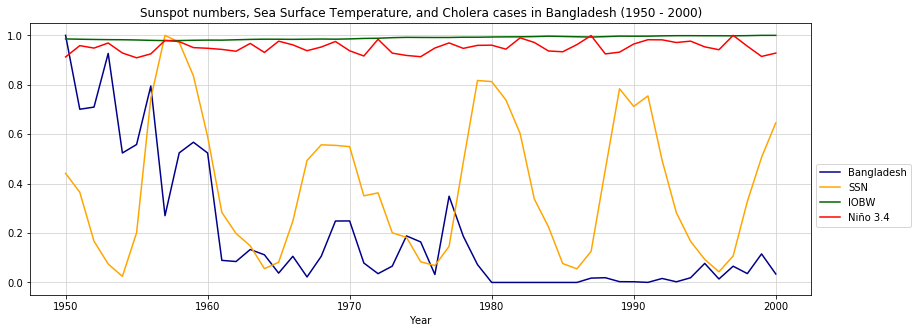

In [6]:
#first let's plot our raw data; divide their maxima so their scale is the same for easy comparison

plt.figure(figsize=(14,5))
plt.plot(time,BANGLADESH/np.max(BANGLADESH),label='cholera in Bangladesh', color='darkblue')
plt.plot(time,SSN/np.max(SSN),label='SSN', color='orange')
plt.plot(time,SST1/np.max(SST1),label='IOBW', color='darkgreen')
plt.plot(time,SST2/np.max(SST2),label='Niño 3.4', color='red')
plt.title('Sunspot numbers, Sea Surface Temperature, and Cholera cases in Bangladesh (1950 - 2000)')
plt.legend(['Bangladesh', 'SSN', 'IOBW', 'Niño 3.4'], loc='best', bbox_to_anchor=(1, 0.5))
plt.xlabel('Year')
plt.grid(color='lightgray')
#plt.savefig("graph bangladesh.png")

In [ ]:
# We see that their peaks somewhat align in some years. Their peaks might align if we shift them left or right... periodogram 
# does that for us.

#Now let's make a periodogram using the gatspy package.

(0, 50)

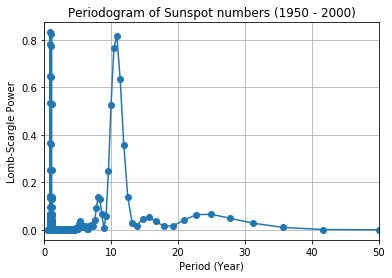

In [24]:
#using periodogram in gatspy, let's see if 11-year sunspot cycle is apparent

from gatspy.periodic import LombScargleFast
model = LombScargleFast().fit(time, SSN)
periods, power = model.periodogram_auto()

plt.plot(periods, power, 'o-')
plt.title('Periodogram of Sunspot numbers (1950 - 2000)')
plt.grid()
plt.xlabel('Period (Year)')
plt.ylabel('Lomb-Scargle Power')
plt.xlim(0,50)
#plt.savefig("lomb ssn bangladesh.png")

In [8]:
#using the model above, compute the best period which should be between 9 and 12 years as shown above

model.optimizer.period_range=(9, 12)
period = model.best_period
print("period = {0}".format(period))

Finding optimal frequency:
 - Estimated peak width = 0.126
 - Using 5 steps per peak; omega_step = 0.0251
 - User-specified period range:  9 to 12
 - Computing periods at 8 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
period = 10.718879519794198


In [ ]:
# and that's the 11-year sunspot cycle

Text(0,0.5,'SSN')

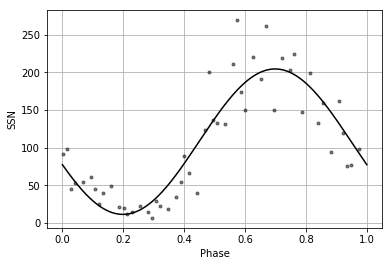

In [10]:
#this is just a trick to slice the time in multiples of the period
phase = (time / period) % 1

# cut phase 0-1 in 1000 slices
phase_fit = np.linspace(0, 1, 1000)
# cut compute the model
SSN_fit = model.predict(period * phase_fit, period=period)

# Plot the phased data & model
plt.plot(phase, SSN, '.k', alpha=0.5)
plt.plot(phase_fit, SSN_fit, '-k')
plt.grid()
plt.xlabel('Phase')
plt.ylabel('SSN')
#plt.savefig("insert_filename.png")

In [ ]:
# Can we get the same periodicity in our cholera data?

(0, 50)

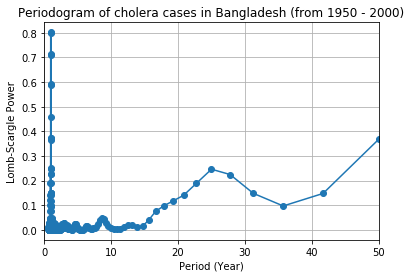

In [20]:
# Again, same procedure;

from gatspy.periodic import LombScargleFast
model = LombScargleFast().fit(time, BANGLADESH)
periods, power = model.periodogram_auto()

plt.plot(periods, power, 'o-')
plt.title('Periodogram of cholera cases in Bangladesh (from 1950 - 2000)')
plt.grid()
plt.xlabel('Period (Year)')
plt.ylabel('Lomb-Scargle Power')
plt.xlim(0,50)
#plt.savefig("lomb cholera bangladesh.png")

In [12]:
model.optimizer.period_range=(9, 12)
period = model.best_period
print("period = {0}".format(period))

Finding optimal frequency:
 - Estimated peak width = 0.126
 - Using 5 steps per peak; omega_step = 0.0251
 - User-specified period range:  9 to 12
 - Computing periods at 8 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
period = 8.676538639518743


In [ ]:
# As we see in the periodogram, the 11 year sunspot cycle does not coincide with the cholera incidence data.

# To further check this, let's correlate them using Spearman and Kendall via scipy module

In [13]:
# Spearman rho

# calculate the spearman's correlation between two variables
from scipy.stats import spearmanr
# calculate spearman's correlation
coef, p = spearmanr(BANGLADESH, SSN)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.016
Samples are uncorrelated (fail to reject H0) p=0.912


In [14]:
# Kendall tau

# calculate the kendall tau correlation between two variables
from scipy.stats import kendalltau
# calculate kendall tau correlation
tau, p_value = kendalltau(BANGLADESH, SSN)
print('Kendall tau correlation coefficient: %.3f' % tau)
# interpret the significance
alpha = 0.05
if p_value > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_value)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p_value)

Kendall tau correlation coefficient: 0.008
Samples are uncorrelated (fail to reject H0) p=0.935


In [ ]:
# So base on the result of the correlation, it supports the periodogram above.

In [ ]:
# Now, let's move to the relationship between SST and cholera incidence, in this case there are no cycles that considered since 
# that Sea Surface Temperature does not have any cycles, unlike the 11-year sunspot cycle.

In [ ]:
# Again, using periodogram we can verify if there is a periodicity between the said variables.

(0, 50)

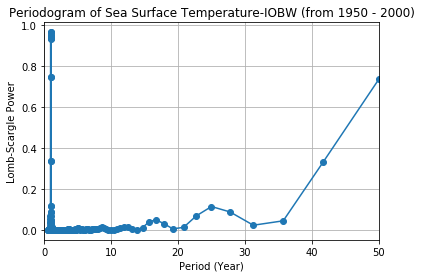

In [16]:
# Periodogram of SST (IOBW)

from gatspy.periodic import LombScargleFast
model = LombScargleFast().fit(time, SST1)
periods, power = model.periodogram_auto()

plt.plot(periods, power, 'o-')
plt.title('Periodogram of Sea Surface Temperature-IOBW (from 1950 - 2000)')
plt.grid()
plt.xlabel('Period (Year)')
plt.ylabel('Lomb-Scargle Power')
plt.xlim(0,50)
#plt.savefig("lomb iobw bangladesh.png")

(0, 50)

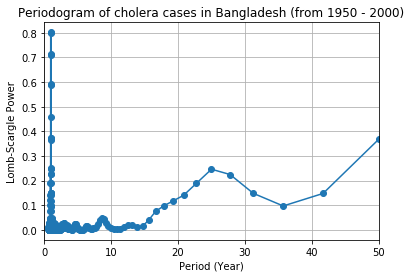

In [17]:
# Peridogram of cholera incidence in Bangladesh

from gatspy.periodic import LombScargleFast
model = LombScargleFast().fit(time, BANGLADESH)
periods, power = model.periodogram_auto()

plt.plot(periods, power, 'o-')
plt.title('Periodogram of cholera cases in Bangladesh (from 1950 - 2000)')
plt.grid()
plt.xlabel('Period (Year)')
plt.ylabel('Lomb-Scargle Power')
plt.xlim(0,50)
#plt.savefig("lomb cholera bangladesh.png")

In [ ]:
# As we see in the periodogram of both SST (IOBW) and cholera incidence we found some frequency peaks that coincides in the same
# time frame, thus, we have to further investigate those by adjusting the "plt.xlim(x,x)" syntax above depending on the time
# period we observed the said periodicity, and check the exact period using the syntax for model optimizer which is shown below,
# it is also important to take note that the minimum period range should be above 0, say for example 0.5... etc.

In [ ]:
model.optimizer.period_range=(0.75, 1)
period = model.best_period
print("period = {0}".format(period))

In [ ]:
# Correlation between SST (IOBW) and cholera incidence

In [18]:
# Spearman rho

# calculate the spearman's correlation between two variables
from scipy.stats import spearmanr
# calculate spearman's correlation
coef, p = spearmanr(BANGLADESH, SST1)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.701
Samples are correlated (reject H0) p=0.000


In [19]:
# Kendall tau

# calculate the kendall tau correlation between two variables
from scipy.stats import kendalltau
# calculate kendall tau correlation
tau, p_value = kendalltau(BANGLADESH, SST1)
print('Kendall tau correlation coefficient: %.3f' % tau)
# interpret the significance
alpha = 0.05
if p_value > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_value)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p_value)

Kendall tau correlation coefficient: -0.471
Samples are correlated (reject H0) p=0.000


In [ ]:
# Lastly, is about the relationship between SST (Niño 3.4) and cholera incidence

(0, 50)

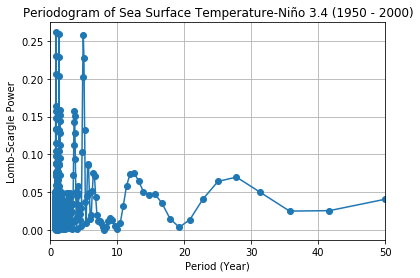

In [21]:
# Periodogram of SST (Niño 3.4)

from gatspy.periodic import LombScargleFast
model = LombScargleFast().fit(time, SST2)
periods, power = model.periodogram_auto()

plt.plot(periods, power, 'o-')
plt.title('Periodogram of Sea Surface Temperature-Niño 3.4 (1950 - 2000)')
plt.grid()
plt.xlabel('Period (Year)')
plt.ylabel('Lomb-Scargle Power')
plt.xlim(0,50)
#plt.savefig("lomb niño 3.4 bangladesh.png")

In [ ]:
# As we see in the periodogram of both SST (Niño 3.4) and cholera incidence we found some frequency peaks that coincides in the 
# same time frame, thus, we have to further investigate those by adjusting the "plt.xlim(x,x)" syntax above, depending on the 
# time period we observed the said periodicity, and check the exact period using the syntax for model optimizer which is shown 
# below, it is also important to take note that the minimum period should be above 0, say for example 0.5... etc.

In [ ]:
model.optimizer.period_range=(7, 9)
period = model.best_period
print("period = {0}".format(period))

In [ ]:
# Correlation between SST (Niño 3.4) and cholera incidence

In [22]:
# Spearman rho

# calculate the spearman's correlation between two variables
from scipy.stats import spearmanr
# calculate spearman's correlation
coef, p = spearmanr(BANGLADESH, SST1)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.701
Samples are correlated (reject H0) p=0.000


In [23]:
# Kendall tau

# calculate the kendall tau correlation between two variables
from scipy.stats import kendalltau
# calculate kendall tau correlation
tau, p_value = kendalltau(BANGLADESH, SST2)
print('Kendall tau correlation coefficient: %.3f' % tau)
# interpret the significance
alpha = 0.05
if p_value > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_value)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p_value)

Kendall tau correlation coefficient: -0.182
Samples are uncorrelated (fail to reject H0) p=0.061
